In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np
import seaborn as sns
from collections import defaultdict
from termcolor import colored, cprint
from PIL import Image
import os
import pickle
import json
import cv2

In [2]:
# create giant dictionary for all data
data_dir = 'mmhs150k/'
tweet_dict = json.load(open(data_dir + 'MMHS150K_GT.json', 'r'))
print('Length of Tweet Dictionary:', len(tweet_dict))

data_dict = dict()
for k, v in tweet_dict.items(): data_dict[k] = {'tweet_text': v['tweet_text'], 
                                                'labels': v['labels']}
    
label_to_str = {0: 'NotHate', 1: 'Racist', 2: 'Sexist', 3: 'Homophobe', 4: 'Religion', 5: 'OtherHate'}

Length of Tweet Dictionary: 149823


Number of Positive Votes: 0 Tweet Count: 57931
Number of Positive Votes: 1 Tweet Count: 54923
Number of Positive Votes: 2 Tweet Count: 28395
Number of Positive Votes: 3 Tweet Count: 8574


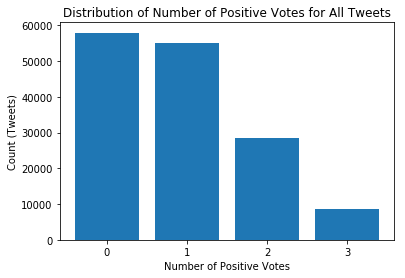

In [3]:
# plot disagreements (positive vs negative)
vote_dict = defaultdict(lambda: 0)
for k, v in data_dict.items():
    votes = [0 if vote == 0 else 1 for vote in v['labels']]
    vote_dict[sum(votes)] += 1
    
for k, v in vote_dict.items():
    print('Number of Positive Votes:', k, 'Tweet Count:', v)

labels, counts = zip(*vote_dict.items())
plt.bar([str(x) for x in labels],counts)
plt.ylabel('Count (Tweets)')
plt.xlabel('Number of Positive Votes')
plt.title('Distribution of Number of Positive Votes for All Tweets')
plt.show()

Number of Positive Votes: 0.67 Tweet Count: 28388
Number of Positive Votes: 0.33 Tweet Count: 54897
Number of Positive Votes: 0.50 Tweet Count: 15
Number of Positive Votes: 1.00 Tweet Count: 8577
Number of Positive Votes: 0.20 Tweet Count: 2
Number of Positive Votes: 0.25 Tweet Count: 13
Number of Positive Votes: 0.00 Tweet Count: 57931


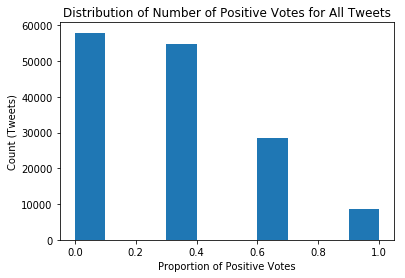

In [4]:
# plot disagreements (positive vs negative)
vote_dict = defaultdict(lambda: 0)
for k, v in data_dict.items():
    votes = [0 if vote == 0 else 1 for vote in v['labels']]
    vote_dict[sum(votes)/len(votes)] += 1
    
for k, v in vote_dict.items(): print('Number of Positive Votes:', "{:.2f}".format(k), 'Tweet Count:', v)

labels, counts = zip(*vote_dict.items())
plt.hist(labels, weights=counts)
plt.ylabel('Count (Tweets)')
plt.xlabel('Proportion of Positive Votes')
plt.title('Distribution of Number of Positive Votes for All Tweets')
plt.show()

Cases with more or less than 3 votes and at least 1 positive vote: 33
Cases with more or less than 3 votes: 74 

Labels: ['NotHate', 'NotHate', 'Racist'] Count: 30324
Labels: ['NotHate', 'NotHate', 'OtherHate'] Count: 10359
Labels: ['NotHate', 'Racist', 'Racist'] Count: 8898
Labels: ['NotHate', 'NotHate', 'Sexist'] Count: 8877
Labels: ['NotHate', 'NotHate', 'Homophobe'] Count: 4235
Labels: ['NotHate', 'OtherHate', 'OtherHate'] Count: 3797
Labels: ['NotHate', 'Racist', 'OtherHate'] Count: 3140
Labels: ['NotHate', 'Sexist', 'Sexist'] Count: 2270
Labels: ['NotHate', 'Homophobe', 'Homophobe'] Count: 2190
Labels: ['NotHate', 'Sexist', 'OtherHate'] Count: 2068


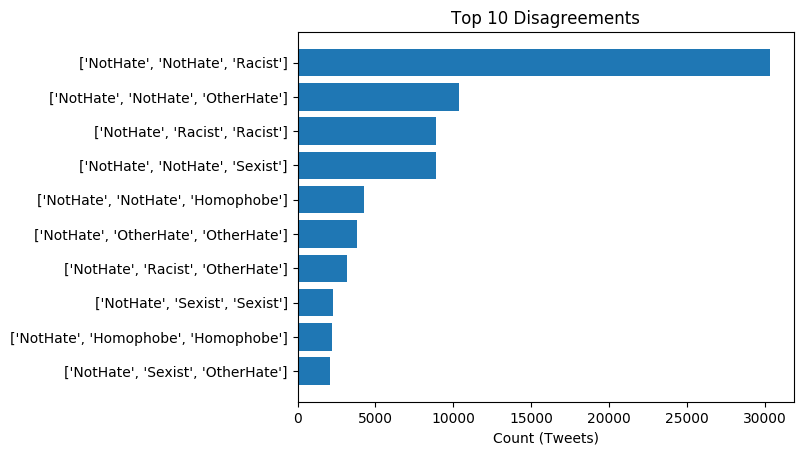

In [5]:
# analyze heterogeneity within positive examples
granular_votes = defaultdict(lambda: 0)
for k, v in data_dict.items():
    votes = [0 if vote == 0 else 1 for vote in v['labels']]
    if sum(votes) > 0: granular_votes[tuple(sorted(v['labels']))] += 1


print('Cases with more or less than 3 votes and at least 1 positive vote:', sum([count for label, count in granular_votes.items() if len(label) != 3]))
print('Cases with more or less than 3 votes:', len([(k, v) for (k, v) in data_dict.items() if len(v['labels']) != 3]), '\n')

plt.rcdefaults()
fig, ax = plt.subplots()

top10 = sorted(granular_votes.items(), key=lambda x: -x[1])[:10]
labels, counts = zip(*top10)
labels = [str([label_to_str[v] for v in triplet]) for triplet in labels]

for label, count in zip(labels, counts): print('Labels:', label, 'Count:', count)

y_pos = np.arange(10)
ax.barh(y_pos, counts, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count (Tweets)')
ax.set_title('Top 10 Disagreements')
plt.show()

Tweet body:
	Kotal Khan the cat: meow meow nigga  U:.... https://t.co/CFsYybQrMx
Image text:
	Made With VivaVideo 


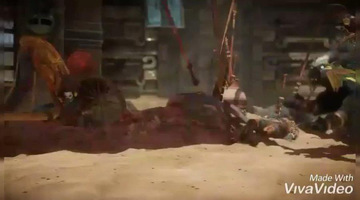


Tweet body:
	I got used for an intro but the Nigger Agenda will always succeed 🤝  @scarz99 @MilkHenny @ninethouxan https://t.co/9Lg3z9YbFg
Image text:
	0:01 -3:04 NI**A AGENDA anehtah Get SoundCloug 


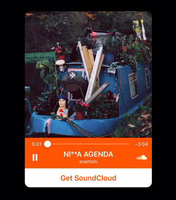


Tweet body:
	CHOOSE ONE TITLE YE TWAT https://t.co/yhMoBj36VP
Image text:
	The Time For Reunification Has Come! Pieeolo's Unshakeable Resolve 


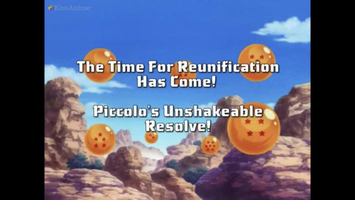


Tweet body:
	:this nigga will tell u he heard a frog 🐸 bark😂 https://t.co/odU9CVrTMJ
Image text:
	None


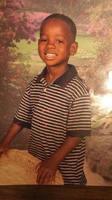


Tweet body:
	I’m dead at this nigga recreating how Michael looked in that new footage 😭 https://t.co/Kct9PPOXZJ
Image text:
	YIqMia SVI 


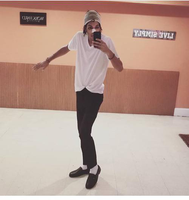


Tweet body:
	everybody and dey mama know dis nigga stay wit the fuk shit 😭😭 https://t.co/AbQq9mProW
Image text:
	0:59 Je 


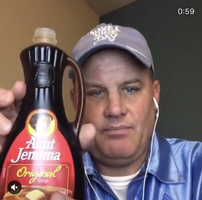


Tweet body:
	@ChildishEliyah Fuck all that shit you talkin nigga https://t.co/HVibJrBodp
Image text:
	None


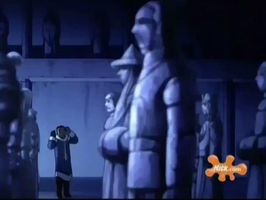


Tweet body:
	@RealJamesWoods Democrats be like...... #BuildTheWall https://t.co/w1r0d1LRsw
Image text:
	None


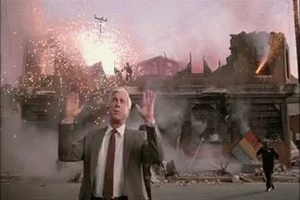


Tweet body:
	@Akademiks Imagine being as retarded as this nigga smh https://t.co/mo4SKz07yi
Image text:
	GNA i want all the smoke 9 70 Tweet your reply 


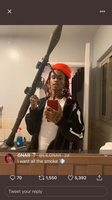


Tweet body:
	"If your ass a rich nigga, Imma love you till you ain't one!" https://t.co/kguomf2EeO
Image text:
	None


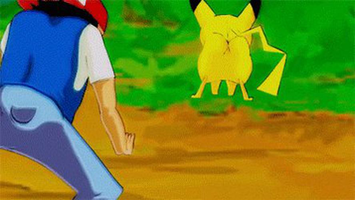


Tweet body:
	VOTE @GOP, HELP @realDonaldTrump END #invasion, FED &amp; STATE GOV CRIME SPREE!  #BuildTheWall #MAGA https://t.co/7SbnjsiBi6
Image text:
	VOTE RED OR AMERICA WILL BE DEAD 


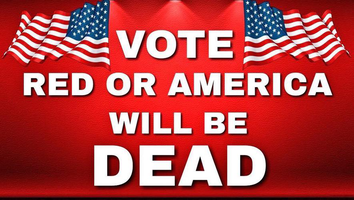


Tweet body:
	If that nigga wanted $1M dollar house in Texas he woulda came got one STOP HATING https://t.co/lFCwnc8DvX
Image text:
	None


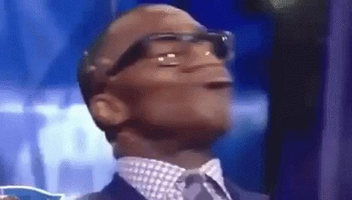


Tweet body:
	😂😂😂😂 RT @KneeshaBelle: “NAIL THAT NIGGA FEET TOO!” https://t.co/TrDSScCLOw
Image text:
	None


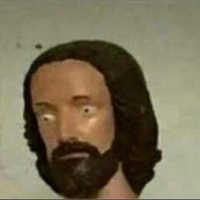


Tweet body:
	Happy birthday big fella! @JackHuddo  we dont have a pic together so have this gif of a cooked cunt ❤️🎂 https://t.co/ySfzCjvue7
Image text:
	None


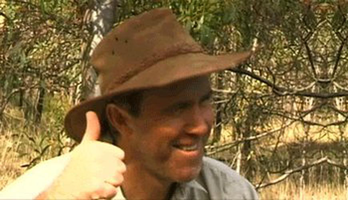


Tweet body:
	@MrAceB85 “You tell me”   As she would say, “my nigga” https://t.co/5FHA0FCvjS
Image text:
	None


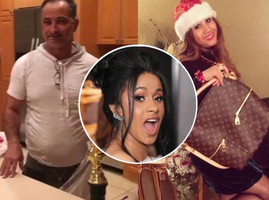


Tweet body:
	Putting the CUNT into Scunthorpe 👊🏻😎🤷🏻‍♂️🍻 #IronOnTour https://t.co/8VcR48AzrK
Image text:
	Scunthorpe TRANSPENN EXPRE 


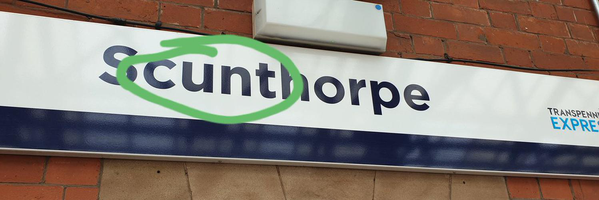


Tweet body:
	'Mary Poppins Returns' is proof that Dick Van Dyke hasn't aged a day in 50 years https://t.co/t1Z32qHRbZ https://t.co/AgbDbcU0Hz
Image text:
	Lin-Manuel Miranda The glo up 


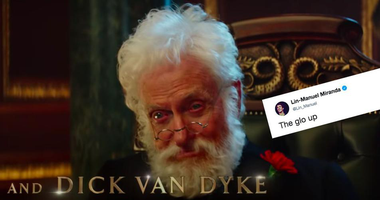


Tweet body:
	Now Playing Billy Lee Riley - Talk To Me Softly - Hillbilly Rockin' Man On https://t.co/ttDs9OfHyy https://t.co/3sbbyST5RH
Image text:
	None


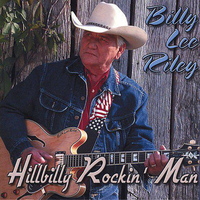


Tweet body:
	Never trust a nigga dat can wear blacc forces nd smile in ya face 😅🤷🏾‍♂️ https://t.co/vjI6N0L0Nt
Image text:
	None


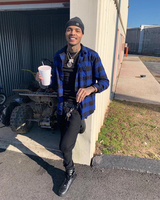


Tweet body:
	“What kinda nigga throw a birthday bash in the middle of the summer in some fuckin leather pants” 😂😂😂 https://t.co/1YRXNtWMja
Image text:
	TRAP-GODS 


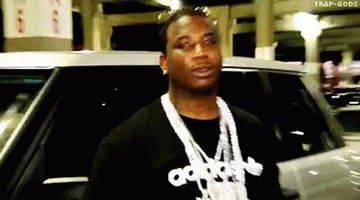

In [6]:
# view examples of [not hate, not hate, racist]
from PIL import Image
for k, v in [(k, v) for (k, v) in data_dict.items() if sorted(v['labels']) == [0,0,1]][:20]:
    
    # print tweet body
    cprint('Tweet body:', 'red')
    cprint('\t' + v['tweet_text'])
    
    # print image text
    cprint('Image text:', 'red')
    try:
        text = json.load(open(data_dir + 'img_txt/' + k + '.json', 'r'))
        print('\t' + text['img_text'])
    except Exception as e: print('\tNone')
    
    # show image
    height = 200
    im = Image.open(data_dir + 'img_resized/' + k + '.jpg')
    im = im.resize((int(height * im.size[0]/float(im.size[1])), height), Image.ANTIALIAS)
    display(im)
    print()

Tweet ID: 1045797405147451392
THE FRAT RELA DABE, WY DONT YOU PUT WERE FRIENDS DONN THOSE SCALES AND HAVE ANOTHER DRINK! OF BRETT KAVANAUGH. TOGA! UDICIAR 


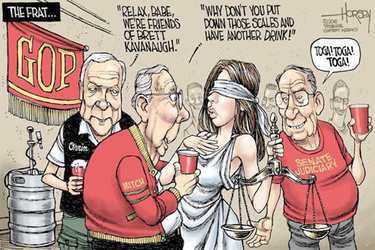


Tweet ID: 1044962210462748673
THE TRIAL O OFFICER JASON VAN DYKE 


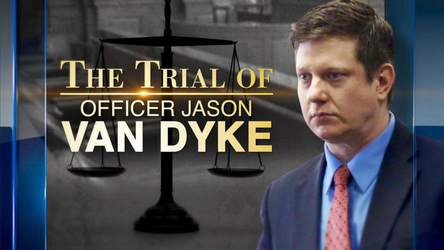


Tweet ID: 1108245165049679872
SILENCE 


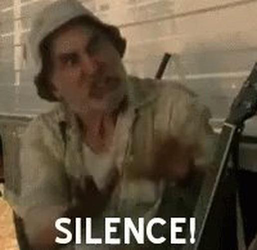


Tweet ID: 1114857626037305345
С НАТ 


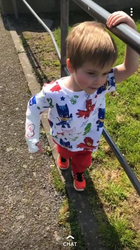


Tweet ID: 1037436439917719563
WHY NOT BOTH 


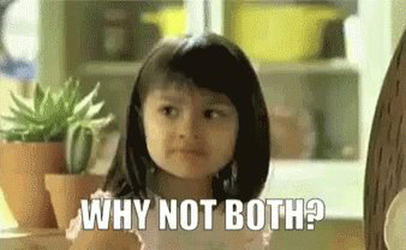


Tweet ID: 1115626641533755392
DOTA 2 STATS BETS ESPORTS PROFILES 


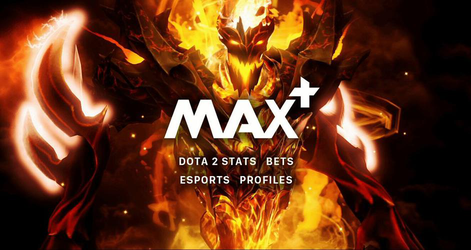


Tweet ID: 1057066706470879232
CENTRAL AMERICAN CARAVANS GULF OF MEXICO MEXICO ク. GUATEMALA CITY GUATEMALA EL SALVADOR NILTEPEC CIUDAD HIDALGO HONDURAS SAN SALVADOR LOU DOBBS FOA -TONIGHT BUSINESS 


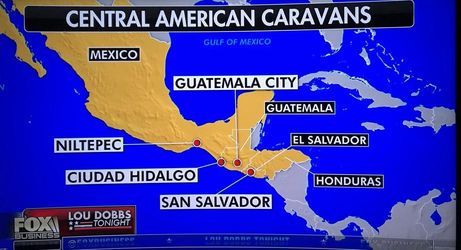


Tweet ID: 1108694661302906880
obrambo 


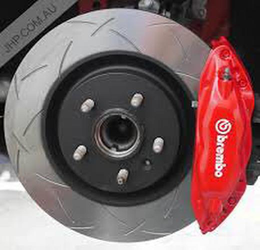


Tweet ID: 1056957127036715012
Bike Shed 


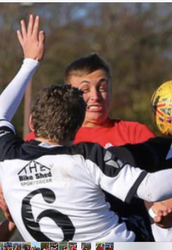


Tweet ID: 1115100537442185216
Haiti's first president Jean-Jacques Dessalines called Polish people "the White Negroes of Europe", which was then regarded a great honour, as it meant brotherhood between Poles and Haitians. Us Poles have the infinite N word pass making us the most powerful white people 


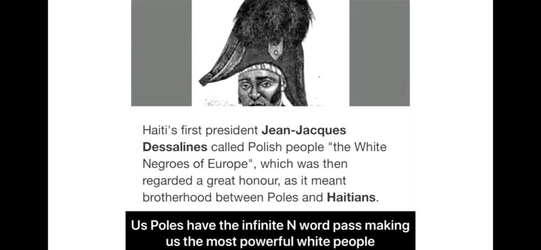


Tweet ID: 1057623079659233280
Dumbrellas 


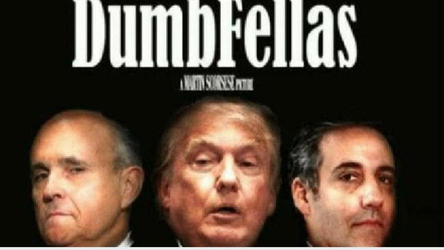


Tweet ID: 1109605949608787970
#EmpreFinale 


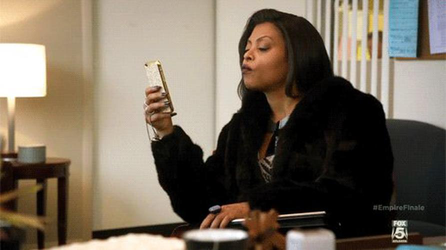


Tweet ID: 1037310215547498496
YOU WENT FULL RETARD NEVER GO FULL RETARD TROLL 


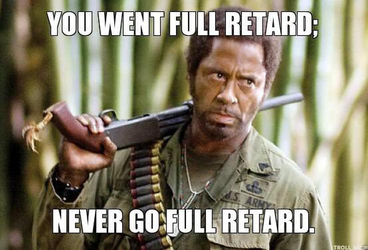


Tweet ID: 1114528185297846272
15:58 2:03 0:42 İNFOMERCİALS İNTERLuDE (feat. Sipho the Gift-İNDİGO 4b) 


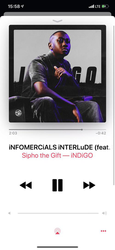


Tweet ID: 1106824295387447297
KAKT 


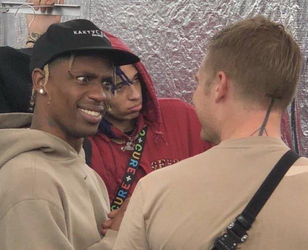


Tweet ID: 1042561210955194373
Whatever you say Liberal 


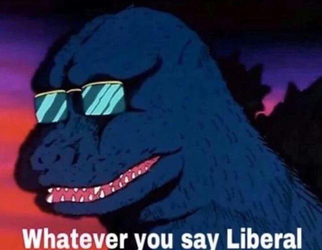


Tweet ID: 1037262827252137984
Home si iDE2197 The eartha,hungry theots ane cem learing, The Its heart 


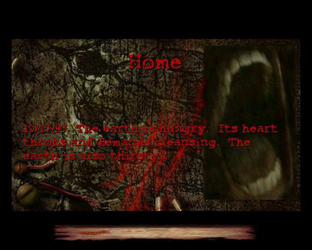


Tweet ID: 1113624575043088385
This is bad, luv 


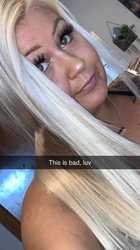


Tweet ID: 1055934636092780544
MARCHAND UPEN DAIL 


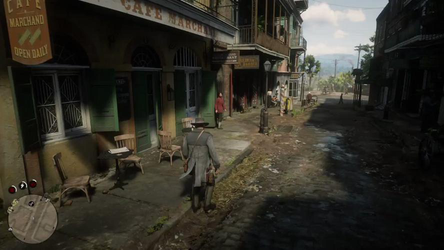


Tweet ID: 1058938335417131008
REALITYKIN 


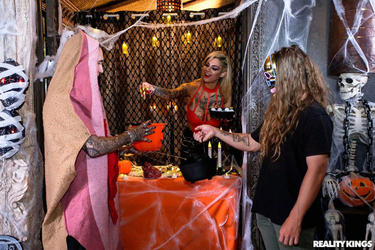

In [7]:
# check OCR accuracy
for filename in os.listdir(data_dir + 'img_txt')[:20]:
    cprint('Tweet ID: ' + filename.split('.')[0], 'red')
    img_txt = json.load(open(data_dir + 'img_txt/' + filename, 'r'))
    print(img_txt['img_text'])
    
    height = 250
    im = Image.open(data_dir + 'img_resized/' + filename.split('.')[0] + '.jpg')
    im = im.resize((int(height * im.size[0]/float(im.size[1])), height), Image.ANTIALIAS)
    display(im)
    print()